# EDA

### 데이터 불러오기

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

mpl.matplotlib_fname()

버전:  3.0.2
설치 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\Ansehee\.matplotlib
캐시 위치:  C:\Users\Ansehee\.matplotlib


'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [14]:
df = pd.read_csv('reviews.csv')
df.tail()

,Unnamed: 0,index,product_name,rating,skin_type,review
60933,60934,995,닥터자르트 시카페어 카밍 젤 크림 80ml (시카 젤크림),5,None,믿쓰템 bb 재구매 했습니다 ! 향도 은은하고 수분감도 좋아서 계속해서 잘 쓸거같아...
60934,60935,996,닥터자르트 시카페어 카밍 젤 크림 80ml (시카 젤크림),5,None,자극없이 굉장히 순하고피부에 수분감을 줄 수 있어서 좋아요크림형처럼 무겁지않아서 산...
60935,60936,997,닥터자르트 시카페어 카밍 젤 크림 80ml (시카 젤크림),5,None,일년넘게 쓰고 있는 제품수분 부족형 지성인데 크림형은 너무 무거워서젤타입으로 계속 ...
60936,60937,998,닥터자르트 시카페어 카밍 젤 크림 80ml (시카 젤크림),5,None,티트리 향이 너무좋구!!피부가 너무 좁쌀이 심해 발라봤는데 다음 날 아침 후면 바로...
60937,60938,999,닥터자르트 시카페어 카밍 젤 크림 80ml (시카 젤크림),5,None,향도 좋고 부드럽게 잘 발리고 붉은끼가 많이 없어진 것 같아요 다 쓰면 또 살 것 ...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60938 entries, 0 to 60937
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    60938 non-null  int64 
 1   index         60938 non-null  int64 
 2   product_name  60938 non-null  object
 3   rating        60938 non-null  int64 
 4   skin_type     60938 non-null  object
 5   review        60938 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.8+ MB


### 제품

88개 제품 존재

In [5]:
df['product_name'].value_counts()

피지오겔 레드수딩 AI 진정보습 크림 100ml 기획(+AI크림10ml*2)               990
[한정기획] 한율 어린쑥수분진정크림 핸드크림추가기획(50ml+25ml+시트1매+핸드크림50ml)    990
쏘내추럴 올 데이 메이크업 픽서 대용량 120ml [안개분사 캔타입]                   990
브링그린 사철쑥카밍밸런스토너510mL                                     990
브링그린 사철쑥 카밍 리페어 크림 1+1 한정기획                              990
                                                        ... 
가히 하이라이터                                                  92
★온라인 한정 기획★ 가히 멀티밤&엑스틴 C밤 듀오                              78
CNP 프로폴리스 에너지 앰플 미스트 250ml 1+1 기획                         55
[증량] 바이오힐보 판테놀시카 배리어크림 대용량 기획 100ml                       38
라운드랩 1025 독도 로션 400ml 대용량                                 10
Name: product_name, Length: 88, dtype: int64

In [101]:
product_df = pd.get_dummies(df['product_name'])
product_df.sum()

CNP 프로폴리스 앰플 액티브 크림 기획(2201)(50ml+31ml*2ea)          184
CNP 프로폴리스 에너지 액티브 앰플 기획(2201)(30ml+15ml+10ml*2ea)    701
CNP 프로폴리스 에너지 앰플 미스트 250ml 1+1 기획                     55
CNP 프로폴리스 트리트먼트 앰플 에센스 기획(2201)(150ml+100ml+50ml)    257
[1등잡티세럼] 아이소이 불가리안 로즈 블레미쉬 케어 업 세럼 더블세트              977
                                                    ... 
토리든 다이브인 저분자 히알루론산 세럼 50ml                           960
피지오겔 DMT 로션 200ml 기획 (토너15ml&화장솜5매)                  878
피지오겔 DMT 페이셜 크림 150ml                                854
피지오겔 레드수딩 AI 진정보습 로션 200ml                           989
피지오겔 레드수딩 AI 진정보습 크림 100ml 기획(+AI크림10ml*2)           990
Length: 88, dtype: int64

### 평점별 리뷰 분포

In [6]:
df['rating'].value_counts()

5    48819
4     8961
3     2341
2      415
1      402
Name: rating, dtype: int64

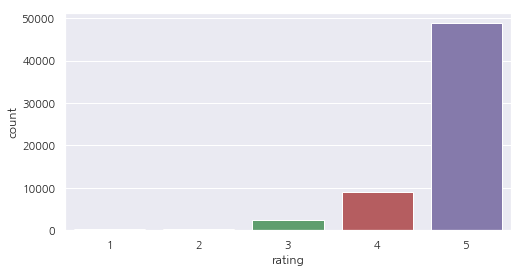

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.countplot(x='rating', data=df)
plt.show()

평점 1,2는 부정적 리뷰, 평점 4,5는 긍정적 리뷰로 생각한다면

+3까지는 부정리뷰로 포함할 수 있을까..?

817 57780


<BarContainer object of 2 artists>

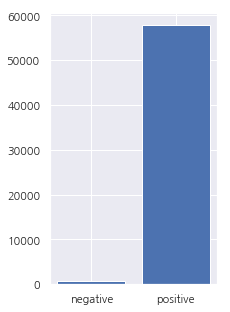

In [17]:
negative = df[df['rating'] < 3]
positive = df[df['rating'] > 3]

print(len(negative), len(positive))
fig, ax = plt.subplots(1, 1, figsize=(3,5))
plt.bar(['negative', 'positive'], (len(negative), len(positive)))

### 피부타입 별 분포

In [7]:
df['skin_type'].value_counts()

None    41734
복합성      9682
건성       5387
지성       2734
민감성       649
트러블성      304
웜톤        108
쿨톤         81
중성         80
약건성        78
모공         33
각질         30
미백         13
블랙헤드        4
트러블         4
겨울쿨톤        4
여름쿨톤        3
가을웜톤        3
피지과다        2
잡티          1
다크서클        1
아토피         1
봄웜톤         1
주름          1
Name: skin_type, dtype: int64

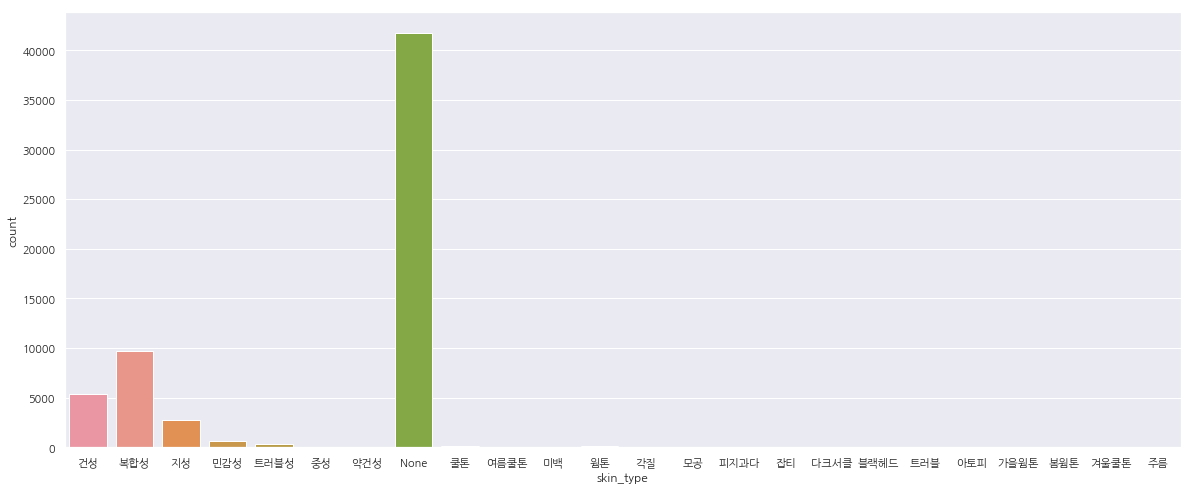

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(20,8))
sns.countplot(x='skin_type', data=df)
plt.show()

5387 9682 2734


<BarContainer object of 3 artists>

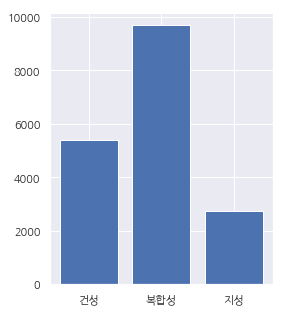

In [21]:
dry = df[df['skin_type'] == '건성']
complexity = df[df['skin_type'] == '복합성']
oily = df[df['skin_type'] =='지성']

print(len(dry),len(complexity),len(oily))

fig, ax = plt.subplots(1, 1, figsize=(4,5))
plt.bar(['건성','복합성','지성'],(len(dry),len(complexity),len(oily)))

### 긍부정 별 리뷰 내용

In [22]:
from collections import Counter, defaultdict
from konlpy.tag import Okt
okt = Okt()

In [23]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [25]:
negVoca = defaultdict(Counter) # key : 형태소 value : dict()의 key: 단어 : 카운트
posVoca = defaultdict(Counter) 

# 리뷰데이터 (token, 품사) 별로 카운팅 하기
for review in negative['review']:
    morphemes = okt.pos(review) # review 형태소 분석하기
    for (token, pos) in morphemes:
        negVoca[pos][token] += 1

for review in positive['review']:
    morphemes = okt.pos(review) # review 형태소 분석하기
    for (token, pos) in morphemes:
        posVoca[pos][token] += 1

In [26]:
print(posVoca['Adjective']) 

Counter({'같아요': 28163, '좋아요': 19509, '좋은': 15024, '입니다': 14989, '있는': 8271, '있어요': 7572, '같은': 7084, '좋고': 6487, '있어서': 6242, '좋아서': 5261, '없고': 5080, '꾸준히': 4939, '순하고': 4824, '있습니다': 4458, '같습니다': 4187, '확실히': 3998, '좋습니다': 3922, '촉촉하고': 3809, '좋았어요': 3681, '좋을': 3665, '없어서': 3525, '같아서': 3521, '있는데': 3501, '좋다고': 3339, '건조한': 3321, '좋네요': 3083, '가벼운': 2930, '없는': 2613, '가볍게': 2563, '있을': 2366, '그런지': 2366, '많은': 2355, '순해서': 2350, '같고': 2334, '없어요': 2281, '그런': 2274, '있고': 2265, '아니라': 2058, '예민한': 2054, '순한': 2009, '굉장히': 1934, '괜찮은': 1907, '많아서': 1874, '촉촉한': 1816, '촉촉하게': 1807, '좋': 1732, '같네요': 1692, '만족합니다': 1559, '민감한': 1551, '건조해서': 1518, '있었는데': 1488, '아니고': 1487, '이런': 1466, '유명한': 1435, '딱히': 1406, '같아': 1396, '같은데': 1385, '좋더라구요': 1381, '좋았습니다': 1379, '부드럽게': 1338, '작은': 1335, '묽은': 1331, '무거운': 1302, '충분히': 1300, '있어': 1287, '저렴하게': 1261, '아니지만': 1247, '적당히': 1234, '가볍고': 1221, '좋다는': 1184, '촉촉해서': 1159, '건조할': 1125, '솔직히': 1107, '있지만': 1084, '좋겠어요': 1051, '산뜻한': 1040, '

In [28]:
print(negVoca['Adjective'])

Counter({'같아요': 270, '입니다': 158, '같은': 117, '좋은': 94, '있는': 88, '좋다고': 69, '있어서': 57, '같습니다': 54, '있어요': 48, '아니라': 47, '없고': 45, '같네요': 45, '있는데': 44, '좋아서': 43, '솔직히': 43, '그런': 42, '그런지': 41, '없는': 40, '없어요': 39, '딱히': 39, '좋고': 37, '아니고': 37, '없어서': 37, '있고': 35, '좋을': 33, '좋아요': 33, '같고': 32, '많은': 32, '같은데': 32, '건조한': 31, '있습니다': 30, '같아서': 29, '많아서': 29, '꾸준히': 26, '예민한': 26, '이런': 25, '없습니다': 25, '좋은데': 24, '좋다는': 24, '어떤': 23, '아닌': 22, '안되고': 22, '작은': 20, '없었어요': 20, '아닌데': 20, '괜찮은': 20, '없는데': 20, '가벼운': 19, '민감한': 19, '어떻게': 19, '붉은': 19, '촉촉하고': 19, '좋은지': 19, '굉장히': 18, '심하게': 18, '건조해서': 18, '있을': 18, '아쉽네요': 18, '없네요': 18, '건조하고': 18, '확실히': 16, '같은게': 16, '많고': 16, '따갑고': 16, '아쉬워요': 16, '나쁘지': 16, '좋았어요': 16, '가볍고': 15, '좋': 15, '좋게': 15, '빨갛게': 15, '괜찮을': 15, '간지럽고': 15, '유명해서': 15, '가볍게': 15, '순한': 14, '당연히': 14, '있었어요': 14, '없었는데': 13, '없었습니다': 13, '붉게': 13, '아니면': 13, '아니에요': 13, '없음': 12, '건조할': 12, '아까워서': 12, '아니지만': 12, '건조해요': 12, '기대했는데': 12, '얇게': 11, '있

In [32]:
okt.tagset.items()

dict_items([('Adjective', '형용사'), ('Adverb', '부사'), ('Alpha', '알파벳'), ('Conjunction', '접속사'), ('Determiner', '관형사'), ('Eomi', '어미'), ('Exclamation', '감탄사'), ('Foreign', '외국어, 한자 및 기타기호'), ('Hashtag', '트위터 해쉬태그'), ('Josa', '조사'), ('KoreanParticle', '(ex: ㅋㅋ)'), ('Noun', '명사'), ('Number', '숫자'), ('PreEomi', '선어말어미'), ('Punctuation', '구두점'), ('ScreenName', '트위터 아이디'), ('Suffix', '접미사'), ('Unknown', '미등록어'), ('Verb', '동사')])

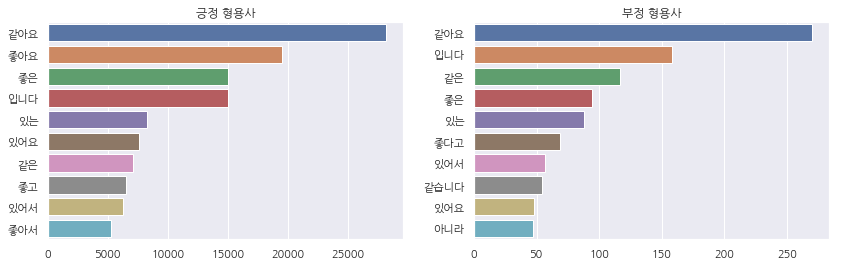

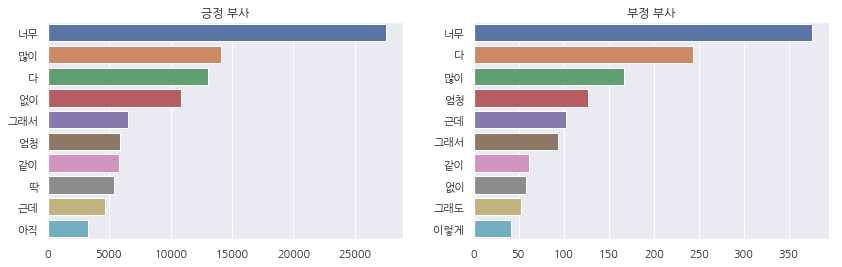

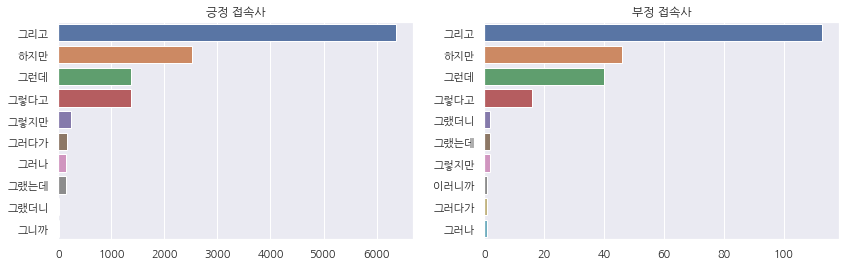

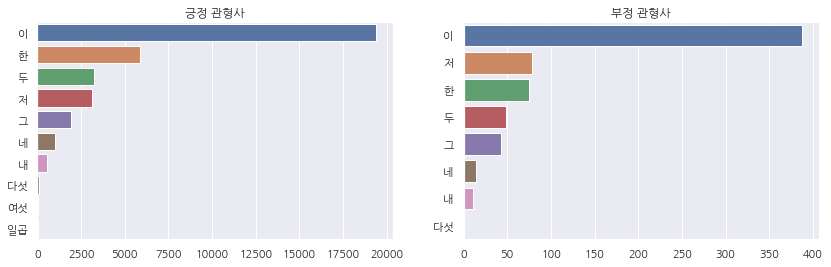

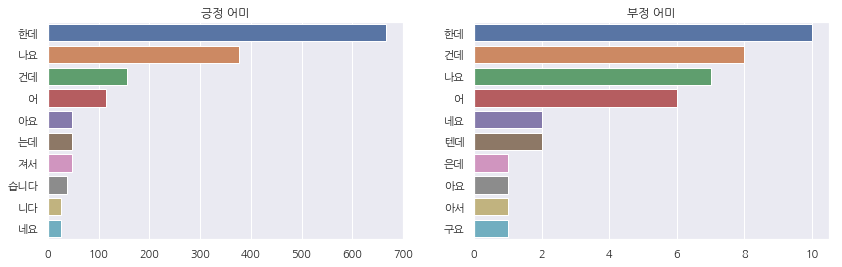

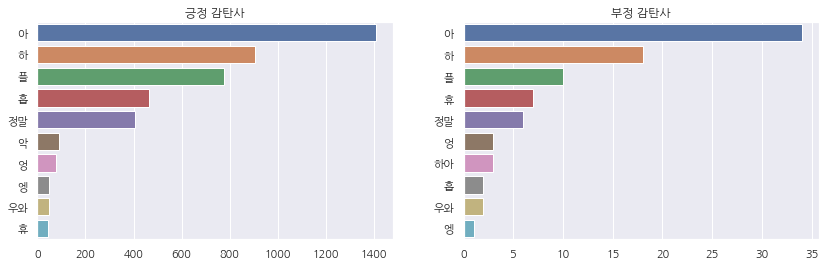

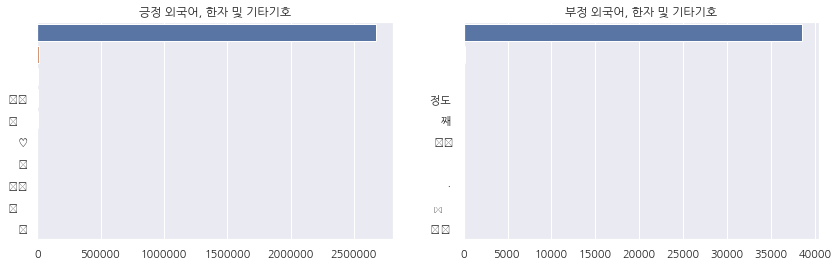

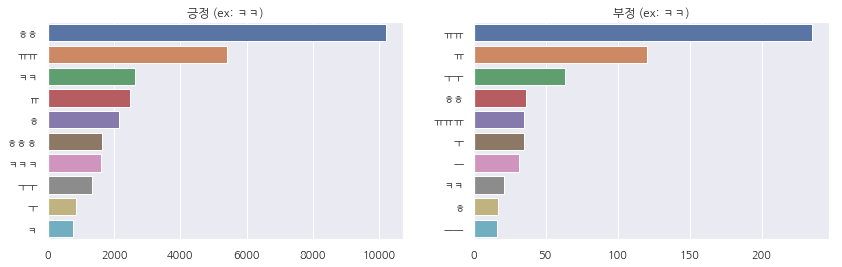

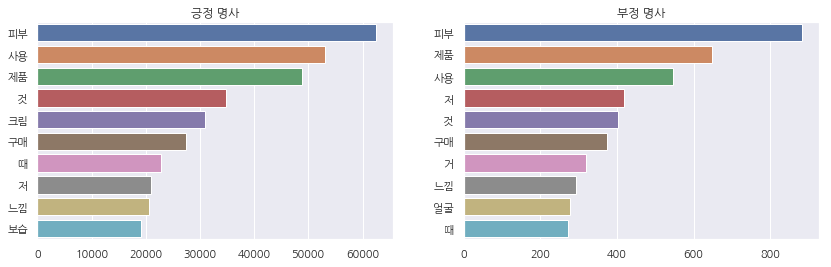

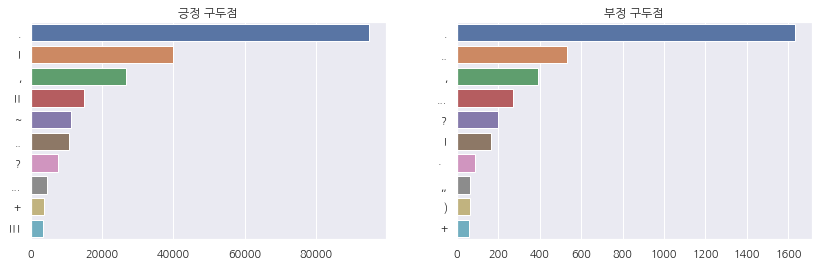

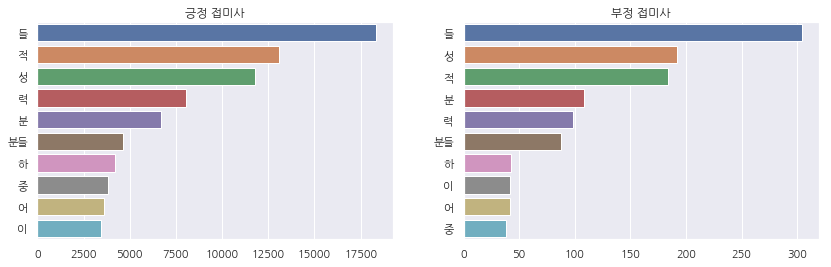

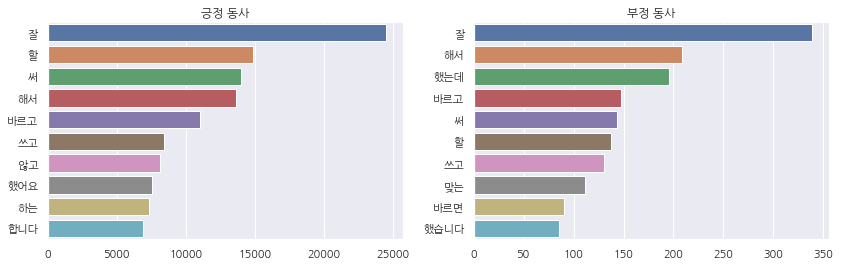

In [37]:
tagdict = {'Adjective': '형용사',
 'Adverb': '부사',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

for pos, korPos in tagdict.items():
    # 품사당 빈도수가 가장 높은 10개
    _pos = posVoca[pos].most_common()[:10]
    _neg = negVoca[pos].most_common()[:10]

    # 해당하는 품사에 데이터가 없다면 패스
    if len(_pos) == 0 or len(_neg) == 0:
        continue
    
    fig = plt.figure(figsize=(14, 4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    # 품사별 토큰의 카운트를 가로그래프로 표시하기 
    sns.barplot([_[1] for _ in _pos], [ _[0] for _ in _pos], ax=ax1)
    sns.barplot([_[1] for _ in _neg], [ _[0] for _ in _neg], ax=ax2)

    ax1.title.set_text('긍정 ' + korPos)
    ax2.title.set_text('부정 ' + korPos)

    plt.show()

### 피부타입 별 리뷰내용

In [46]:
dryVoca = defaultdict(Counter) # key : 형태소 value : dict()의 key: 단어 : 카운트
complexVoca = defaultdict(Counter) 
oilyVoca = defaultdict(Counter)

# 리뷰데이터 (token, 품사) 별로 카운팅 하기
for review in dry['review']:
    morphemes = okt.pos(review) # review 형태소 분석하기
    for (token, pos) in morphemes:
        dryVoca[pos][token] += 1

for review in complexity['review']:
    morphemes = okt.pos(review) # review 형태소 분석하기
    for (token, pos) in morphemes:
        complexVoca[pos][token] += 1

for review in oily['review']:
    morphemes = okt.pos(review) # review 형태소 분석하기
    for (token, pos) in morphemes:
        oilyVoca[pos][token] += 1

In [47]:
print(dryVoca['Adjective']) 

Counter({'같아요': 2742, '좋아요': 1830, '입니다': 1526, '좋은': 1445, '있는': 839, '같은': 793, '있어요': 747, '있어서': 684, '좋고': 599, '좋아서': 546, '꾸준히': 482, '없고': 464, '확실히': 445, '좋았어요': 410, '순하고': 410, '좋을': 399, '있는데': 379, '있습니다': 378, '건조한': 374, '촉촉하고': 361, '좋습니다': 353, '같습니다': 340, '좋다고': 338, '가벼운': 320, '없어서': 307, '같아서': 277, '가볍게': 272, '좋네요': 263, '있을': 256, '없는': 255, '많은': 246, '아니라': 245, '그런지': 244, '있고': 244, '없어요': 241, '순해서': 231, '굉장히': 230, '그런': 220, '촉촉하게': 213, '같고': 205, '순한': 198, '유명한': 195, '예민한': 184, '좋': 179, '촉촉한': 178, '많아서': 178, '부드럽게': 176, '같네요': 173, '묽은': 169, '아니고': 159, '괜찮은': 159, '건조해서': 155, '있어': 150, '이런': 150, '같아': 149, '딱히': 146, '좋더라구요': 146, '같은데': 145, '작은': 144, '충분히': 143, '무거운': 143, '있었는데': 142, '민감한': 140, '촉촉해서': 134, '가볍고': 132, '저렴하게': 123, '촉촉해요': 123, '적당히': 121, '건조할': 120, '있지만': 119, '건조함이': 119, '좋을것': 117, '좋았습니다': 117, '입니당': 112, '아쉬운': 112, '솔직히': 111, '좋겠어요': 111, '아니지만': 110, '산뜻한': 109, '좋아': 103, '아닌': 103, '좋다는': 102, '만족합니다'

In [50]:
print(complexVoca['Adjective'])

Counter({'같아요': 4963, '좋아요': 3184, '좋은': 2730, '입니다': 2591, '있는': 1572, '같은': 1430, '있어요': 1340, '있어서': 1220, '좋고': 1148, '좋아서': 954, '없고': 917, '꾸준히': 846, '순하고': 777, '확실히': 753, '좋았어요': 709, '있습니다': 671, '좋을': 664, '촉촉하고': 625, '있는데': 618, '없어서': 618, '같습니다': 617, '건조한': 605, '좋다고': 589, '같아서': 566, '가벼운': 558, '좋습니다': 552, '없는': 503, '좋네요': 501, '많은': 471, '그런지': 465, '가볍게': 463, '없어요': 435, '있을': 423, '있고': 414, '같고': 405, '그런': 400, '굉장히': 370, '아니라': 367, '순해서': 365, '예민한': 358, '촉촉한': 337, '많아서': 334, '괜찮은': 329, '이런': 315, '좋': 315, '순한': 311, '같네요': 303, '촉촉하게': 298, '좋더라구요': 285, '민감한': 281, '부드럽게': 277, '유명한': 271, '작은': 270, '있어': 269, '딱히': 265, '건조해서': 263, '아니고': 258, '묽은': 252, '같아': 249, '있었는데': 240, '같은데': 237, '좋았습니다': 234, '아니지만': 233, '저렴하게': 232, '가볍고': 225, '무거운': 222, '적당히': 220, '만족합니다': 216, '있지만': 210, '충분히': 209, '솔직히': 208, '빠르게': 208, '산뜻한': 197, '입니당': 196, '건조할': 194, '촉촉해서': 192, '촉촉해요': 190, '없었어요': 188, '무겁지': 187, '좋을것': 187, '좋아': 184, '좋다는': 183, 

In [51]:
print(oilyVoca['Adjective'])

Counter({'같아요': 1466, '좋아요': 857, '입니다': 749, '좋은': 744, '있는': 456, '같은': 412, '있어요': 384, '있어서': 324, '좋고': 291, '좋아서': 275, '꾸준히': 235, '없고': 224, '있습니다': 212, '같습니다': 209, '좋았어요': 198, '좋을': 189, '확실히': 183, '좋습니다': 173, '좋다고': 170, '순하고': 166, '같아서': 165, '있는데': 161, '없는': 150, '가벼운': 149, '없어서': 145, '많은': 131, '좋네요': 130, '같고': 126, '있을': 126, '촉촉하고': 124, '그런지': 123, '그런': 121, '건조한': 119, '없어요': 116, '가볍게': 114, '있고': 109, '굉장히': 106, '아니라': 103, '많아서': 100, '순해서': 97, '괜찮은': 94, '촉촉하게': 89, '있었는데': 83, '순한': 83, '아니고': 83, '예민한': 81, '촉촉한': 75, '같은데': 75, '이런': 75, '좋더라구요': 74, '좋았습니다': 72, '솔직히': 71, '유명한': 70, '같네요': 69, '무거운': 68, '산뜻하게': 67, '작은': 63, '산뜻한': 63, '딱히': 63, '가볍고': 62, '무겁지': 61, '민감한': 61, '많고': 61, '빠르게': 61, '묽은': 60, '없었어요': 59, '만족합니다': 59, '같아': 59, '적당히': 58, '좋': 58, '어떤': 58, '아니지만': 57, '좋을거': 54, '충분히': 54, '좋겠어요': 52, '있지만': 52, '좋다는': 52, '건조할': 51, '부드럽게': 50, '건조해서': 50, '적당한': 49, '저렴하게': 49, '같': 48, '있어': 46, '입니당': 46, '좋아하는': 45, '아쉬운': 45

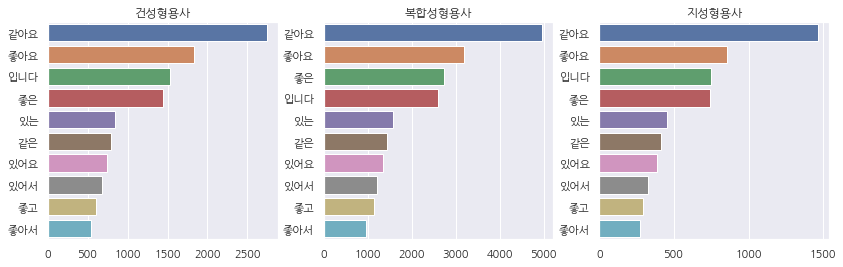

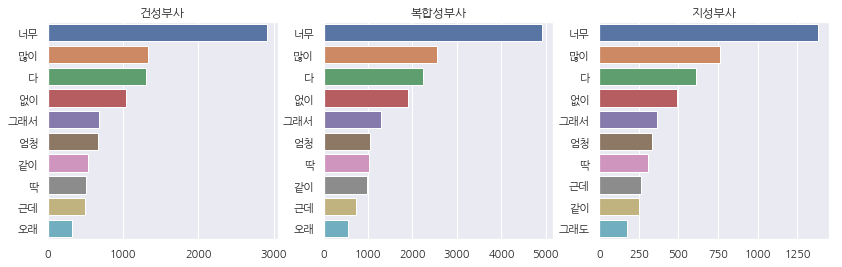

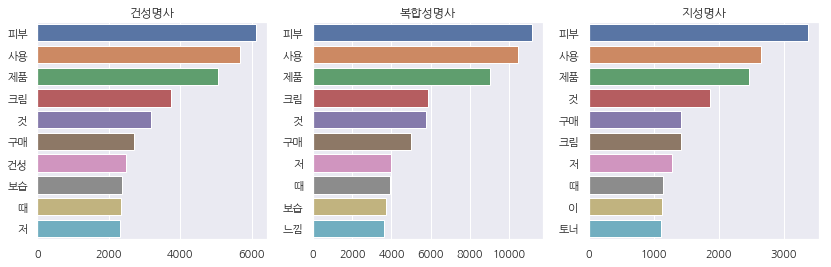

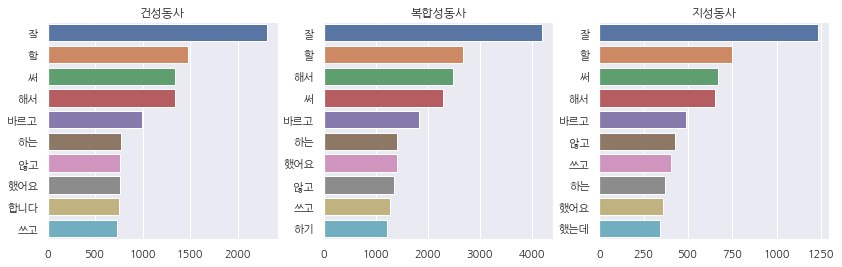

In [58]:
tagdict = {'Adjective': '형용사',
 'Adverb': '부사',
 'Noun': '명사',
 'Verb': '동사'}

for pos, korPos in tagdict.items():
    # 품사당 빈도수가 가장 높은 10개
    _dry = dryVoca[pos].most_common()[:10]
    _com = complexVoca[pos].most_common()[:10]
    _oily = oilyVoca[pos].most_common()[:10]

    # 해당하는 품사에 데이터가 없다면 패스
    if len(_dry) == 0 or len(_com) == 0 or len(_oily)==0:
        continue
    
    fig = plt.figure(figsize=(14, 4))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)

    # 품사별 토큰의 카운트를 가로그래프로 표시하기 
    sns.barplot([_[1] for _ in _dry], [ _[0] for _ in _dry], ax=ax1)
    sns.barplot([_[1] for _ in _com], [ _[0] for _ in _com], ax=ax2)
    sns.barplot([_[1] for _ in _oily], [ _[0] for _ in _oily], ax=ax3)

    ax1.title.set_text('건성' + korPos)
    ax2.title.set_text('복합성' + korPos)
    ax3.title.set_text('지성' + korPos)

    plt.show()